## Cost Function

We cannot use the same cost dunction that we use for linear regression because the Logistic Regression will cause the output to be wavy, causing many local optima. In ther words, it will not be a convex function.

Instead, our cost function for lgistic regression looks like:

$$
J(\theta) = \frac{1}{m} \sum^m_{i = 1} \text{Cost}(h_{\theta}(x^{(i)}), y^{(i)})
\\
\text{Cost}(h_{\theta}, y) = -log(h_{\theta}(x)) \quad \text{if y} = 1
\\
\text{Cost}(h_{\theta}, y) = -log(1 - h_{\theta}(x)) \quad \text{if y} = 0
$$

When $y = 1$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$:

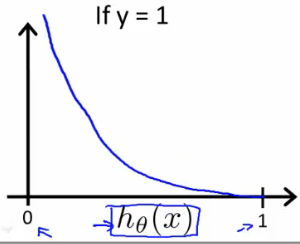

Similarly, when $y = 0$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$:

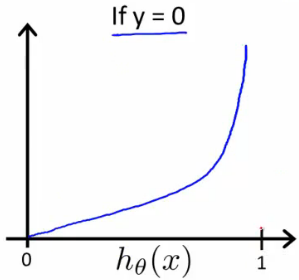

$$
\text{Cost}(h_{\theta}(x), y) = 0 \quad \text{if} \ h_{\theta}(x) = y
\\
\text{Cost}(h_{\theta}(x), y) \to \infty \quad \text{if y} = 0 \ \text{and} \ h_{\theta}(x) \to 1
\\
\text{Cost}(h_{\theta}(x), y) \to \infty \quad \text{if y} = 1 \ \text{and} \ h_{\theta}(x) \to 0
$$

If our correct answer $y$ is $0$, the the cost function will be $0$ if our hypothesis function also outputs $0$. If our hypothesis approaches $1$, then the cost function will approach infinity.

If our correct answer $y$ is $1$, the the cost function will be $0$ if our hypothesis function outputs $1$. If our hypothesis approaches $0$, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that $J(\theta)$ is convex for logistic regression.

## Simplified Cost Function and Gradient Descent

We can compress our cost funtion's two conditional cases into one case:

$$
\text{Cost}(h_{\theta}(x), y) = -y \text{log}(h_{\theta}(x)) - (1 - y) \text{log}(1 - h_{\theta}(x))
$$

Notice that when $y$ is equal to $1$, then the second term $(1 - y) \text{log}(1 - h_{\theta}(x))$ will be zero and will not affect the result. If $y$ is equal to $0$, then the first term $-y\text{log}(h_{\theta}(x))$ will be zero and will not affect the result.

We can fully write out out entire cost function as follows:

$$
J(\theta) = -\frac{1}{m} \sum^m_{i=1} [ y^{(i)}\text{log}(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \text{log}(1 - h_{\theta}(x^{(i)})) ]
$$

A cevtorized implementation is:

$$
h = g(X\theta)
\\
J(\theta) = \frac{1}{m} \bullet \big(-y^T \text{log}(h) - (1 - y)^T \text{log}(1 - h) \big)
$$

#### Gradient Descent

Remember that the general form of gradient descent is:

$\text{Repeat:} \{ $

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
$$

$\} $

We can work out the derivative part using calculus to get:

$\text{Repeat:} \{ $

$$
\theta_j := \theta_j - \frac{\alpha}{m} \sum^m_{i=1} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

$\} $

Notice that this algorithm is identical to the one we used in linear regression. We still have to simultaneously update all values in theta.

A vectoriazed implementation is:

$$
\theta := \theta = \frac{\alpha}{m}X^T(g(X\theta) - \vec{y})
$$

## Advanced Optimization

"*Conjugate gradient*", "*BFGS*" and "*L-BFGS*" are more sophisticated, faster ways to optimize $\theta$, that can be used instead of gradient descent. It's suggested that one should not write these sophisticated algorithms theirself (unless they're an expert in numerical computing), but use the libraries instead, as they're already tested and highly optimized.

First, we need to provide a function that evaluates the following two functions for a given input value $\theta$:

$$
J(\theta)
\\
\frac{\partial}{\partial\theta_j}J(\theta)
$$

We can write a single function that returns both of these (Octave):

```
function [jVal, gradient] = costFunction(theta)
    jVal = [...code to compute J(theta)...];
    gradient = [...code to compute derivative of J(theta)...]
end
```